In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import easygui as ey
import glob2 as glob
import plotly.express as px

In [2]:
path = ey.fileopenbox()

In [3]:
data = pd.read_csv(path)

In [4]:
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [5]:
data_cont = data.drop(columns = ['origin','cylinders','horsepower','year','name'])
data_cat = data.drop(columns = ['displacement','weight','acceleration','Kilometer_per_liter'])

In [39]:
x = data_cont.iloc[:,:3]
y = data_cont.iloc[:,-1]

In [40]:
def normality_check(x):
    s_data = pd.DataFrame(columns = ['Feature','s','p-value','Normal'])
    for feature in x.columns:
        s,p = stats.shapiro(x[feature])
        if p>0.05:
            s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'Yes'},ignore_index = True)
        else:
            s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'No'},ignore_index = True)
        fig , (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = [8,4],)
        sns.kdeplot(x = x[feature],ax = ax1)
        sm.qqplot(data = x[feature],ax = ax2)
        fig.tight_layout(pad = 5)
    return s_data

C:\Users\DELL\AppData\Local\Temp\ipykernel_6928\1620504754.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'No'},ignore_index = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6928\1620504754.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'No'},ignore_index = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6928\1620504754.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'No'},ignore_index = True)


,Feature,s,p-value,Normal
0,displacement,0.880419,0.0,No
1,weight,0.941359,0.0,No
2,acceleration,0.992379,0.039872,No


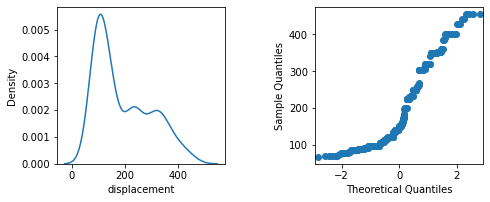

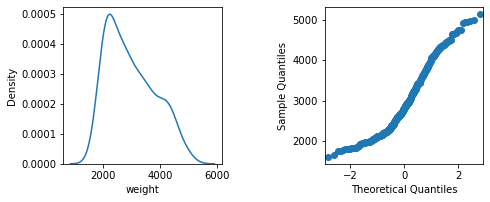

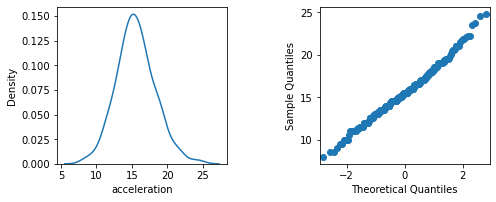

In [46]:
normality_check(x)

In [47]:
def linearity_check(x,y):
    r_data = pd.DataFrame(columns = ['F1','F2','r','p-value','Significant'])
    for f1 in x.columns:
        r,p = stats.pearsonr(x[f1],y)
        if p<0.05:
            r_data = r_data.append({'F1':f1,'F2':y.name,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)
        else:
            r_data = r_data.append({'F1':f1,'F2':y.name,'r':r,'p-value':p,'Significant':'No'},ignore_index = True)
    
    return r_data

In [48]:
linearity_check(x,y)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6928\23516126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r_data = r_data.append({'F1':f1,'F2':y,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6928\23516126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r_data = r_data.append({'F1':f1,'F2':y,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6928\23516126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r_data = r_data.append({'F1':f1,'F2':y,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)


,F1,F2,r,p-value,Significant
0,displacement,0 7.652587 1 6.377156 2 7.65...,-0.804203,0.0,Yes
1,weight,0 7.652587 1 6.377156 2 7.65...,-0.831741,0.0,Yes
2,acceleration,0 7.652587 1 6.377156 2 7.65...,0.420289,0.0,Yes


<AxesSubplot:>

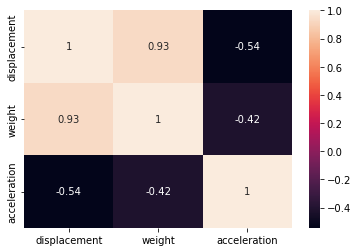

In [44]:
sns.heatmap(data = data_cont.drop(columns = 'Kilometer_per_liter').corr(),annot = True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [35]:
def outlier_check(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    inner = q1 - 1.5*iqr
    outer = q3 + 1.5*iqr
    pos = []
    val = []
    count = 0
    for i,j in enumerate(x):
        if inner<j<outer:
            pass
        else:
            pos.append(i)
            val.append(j)
            count += 1
    print(x.name)
    print(f'No of outliers in {x.name} : {count}')
    print(f'Inner_fence : {inner} , Outer_fence : {outer}')
    for i,j in zip(pos,val):
        print(f'{i} --- {j}')

In [135]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [154]:
data['horsepower'].replace(to_replace = '?', value = 0 ,inplace = True)

In [155]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 0, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [156]:
data["horsepower"]  = data["horsepower"].astype("int")

In [157]:
data["horsepower"].replace({0:data["horsepower"].mean()},inplace = True)

In [158]:
data.horsepower.unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 102.89447236, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [140]:
data['horsepower'].isna().sum()

0

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [160]:
data.horsepower.unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 102.89447236, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [161]:
data.groupby(by = ['origin','cylinders'])['weight'].mean()

origin  cylinders
1       4            2437.166667
        6            3213.905405
        8            4114.718447
2       4            2330.015873
        5            3103.333333
        6            3382.500000
3       3            2398.500000
        4            2153.492754
        6            2882.000000
Name: weight, dtype: float64

In [162]:
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


In [163]:
x = data.iloc[:,:7]
y = data.iloc[:,-1]

In [164]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.821
Model:                             OLS   Adj. R-squared:                  0.818
Method:                  Least Squares   F-statistic:                     255.4
Date:                 Tue, 15 Nov 2022   Prob (F-statistic):          2.24e-141
Time:                         12:16:03   Log-Likelihood:                -699.92
No. Observations:                  398   AIC:                             1416.
Df Residuals:                      390   BIC:                             1448.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -618.8367     42.474    -14.570      0.000    -702.344    -535.329
origin           0.6031      0.117      5.155      0.000       0.373       0.833
cylinders       -0.1780      0.137     -1.300      0.194      -0.447       0.091
displacement     0.0080      0.003      2.521      0.012       0.002       0.014
horsepower      -0.0049      0.006     -0.873      0.383      -0.016       0.006
weight          -0.0029      0.000    -10.467      0.000      -0.003      -0.002
acceleration     0.0433      0.041      1.058      0.290      -0.037       0.124
year             0.3217      0.021     15.001      0.000       0.280       0.364
==============================================================================
Omnibus:                       30.562   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.249
Skew:                           0.516   Prob(JB):                     2.02e-11
Kurtosis:                       4.381   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=123)

In [167]:
x_train

,origin,cylinders,displacement,horsepower,weight,acceleration,year
35,1,6,250.0,100.0,3329,15.5,1971
107,1,6,232.0,100.0,2789,15.0,1973
55,2,4,97.0,60.0,1834,19.0,1971
282,1,4,140.0,88.0,2890,17.3,1979
122,2,4,121.0,110.0,2660,14.0,1973
...,...,...,...,...,...,...,...
72,1,8,304.0,150.0,3892,12.5,1972
372,1,4,151.0,90.0,2735,18.0,1982
302,1,4,105.0,70.0,2150,14.9,1979
288,1,8,318.0,135.0,3830,15.2,1979


In [168]:
x_test

,origin,cylinders,displacement,horsepower,weight,acceleration,year
233,2,4,97.0,78.0,1940,14.5,1977
154,1,6,250.0,72.0,3432,21.0,1975
311,1,4,98.0,70.0,2120,15.5,1980
53,3,4,71.0,65.0,1773,19.0,1971
247,3,4,85.0,70.0,2070,18.6,1978
...,...,...,...,...,...,...,...
234,1,4,151.0,88.0,2740,16.0,1977
353,2,4,105.0,74.0,2190,14.2,1981
342,1,4,135.0,84.0,2385,12.9,1981
134,1,6,258.0,110.0,3632,18.0,1974


In [169]:
y_train

35      7.227443
107     7.652587
55     11.478880
282     9.480705
122    10.203449
         ...    
72      6.377156
372    11.478880
302    14.667458
288     7.737615
28      3.826293
Name: Kilometer_per_liter, Length: 278, dtype: float64

In [170]:
y_test

233    12.329168
154     6.377156
311    13.647113
53     13.179455
247    16.750662
         ...    
234    10.416021
353    14.029742
342    12.754311
134     6.802299
104     5.101724
Name: Kilometer_per_liter, Length: 120, dtype: float64

In [172]:
# Model 2
x1_train = sm.add_constant(x_train)
model_2 = sm.OLS(y_train,x1_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.818
Model:                             OLS   Adj. R-squared:                  0.814
Method:                  Least Squares   F-statistic:                     173.6
Date:                 Tue, 15 Nov 2022   Prob (F-statistic):           4.36e-96
Time:                         12:31:34   Log-Likelihood:                -498.68
No. Observations:                  278   AIC:                             1013.
Df Residuals:                      270   BIC:                             1042.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -641.7793     53.071    -12.093      0.000    -746.265    -537.293
origin           0.5114      0.145      3.525      0.000       0.226       0.797
cylinders       -0.1743      0.174     -1.001      0.318      -0.517       0.168
displacement     0.0094      0.004      2.437      0.015       0.002       0.017
horsepower      -0.0057      0.007     -0.867      0.387      -0.019       0.007
weight          -0.0030      0.000     -8.951      0.000      -0.004      -0.002
acceleration     0.0685      0.050      1.361      0.175      -0.031       0.167
year             0.3333      0.027     12.453      0.000       0.281       0.386
==============================================================================
Omnibus:                       19.675   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.264
Skew:                           0.504   Prob(JB):                     1.20e-06
Kurtosis:                       4.157   Cond. No.                     2.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""